In [63]:
import pickle as pk
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
subreddit = 'Judaism'
sample_fn = "Judaism-sample1676612986"

In [65]:
samples = pk.load(open(f"./data/samples/{sample_fn}.pk", "rb"))

In [66]:
samples.head()

,year-month,text
id,,
cf1yhek,2014-01,wellthe arab state of jordan was created for t...
cel4dc9,2014-01,can you please return rjewishmusic to the list...
cevoo7z,2014-01,make sure they take out the parshios first
cf2poxr,2014-01,no brooklyn is yidville hymietown is on long i...
cf10dah,2014-01,what other medical services does the orthodox ...


In [79]:
from dateutil.parser import parse
from dateutil.relativedelta import relativedelta

# read scores
start_month = '2014-01'
end_month = "2015-11"
this_month = start_month
token_ppls = dict()
while parse(this_month) <= parse(end_month):
    scores = pk.load(open(f"./data/output/distilgpt2_{subreddit}_{this_month}-{sample_fn}-scores.pk", "rb"))
    samples[f'model={this_month}'] = scores['sentence_ppls']
    token_ppls[this_month] = scores['token_ppls']
    this_month = (parse(this_month) + relativedelta(months=1)).strftime("%Y-%m")



In [68]:
ppl_df = samples.groupby("year-month").median()
for i in range(min(ppl_df.shape)):
    ppl_df.iloc[i,i] = np.nan
ranked = ppl_df.rank(axis=1)

/var/folders/dv/nftpj5h959v6gdnphbshtdzr0000gn/T/ipykernel_65436/258897080.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ppl_df = samples.groupby("year-month").median()


In [69]:
ranked

,model=2014-01,model=2014-02,model=2014-03,model=2014-04,model=2014-05,model=2014-06,model=2014-07,model=2014-08,model=2014-09,model=2014-10,...,model=2015-02,model=2015-03,model=2015-04,model=2015-05,model=2015-06,model=2015-07,model=2015-08,model=2015-09,model=2015-10,model=2015-11
year-month,,,,,,,,,,,,,,,,,,,,,
2014-01,NaN,2.0,21.0,20.0,16.0,22.0,10.0,6.0,19.0,14.0,...,3.0,8.0,15.0,9.0,13.0,1.0,5.0,17.0,4.0,7.0
2014-02,3.0,NaN,18.0,22.0,12.0,21.0,15.0,11.0,19.0,5.0,...,9.0,6.0,7.0,16.0,10.0,2.0,1.0,17.0,8.0,14.0
2014-03,6.0,1.0,NaN,20.0,7.0,22.0,11.0,5.0,18.0,14.0,...,2.0,3.0,13.0,19.0,16.0,9.0,4.0,15.0,10.0,8.0
2014-04,3.0,4.0,5.0,NaN,19.0,22.0,15.0,11.0,20.0,16.0,...,1.0,7.0,10.0,8.0,18.0,2.0,12.0,21.0,9.0,14.0
2014-05,4.0,2.0,19.0,21.0,NaN,22.0,13.0,20.0,15.0,11.0,...,5.0,6.0,17.0,9.0,7.0,1.0,3.0,18.0,10.0,12.0
2014-06,6.0,3.0,21.0,22.0,16.0,NaN,7.0,12.0,15.0,20.0,...,4.0,14.0,13.0,11.0,18.0,1.0,2.0,19.0,5.0,10.0
2014-07,4.0,5.0,16.0,21.0,20.0,22.0,NaN,13.0,19.0,18.0,...,8.0,10.0,9.0,6.0,17.0,2.0,1.0,12.0,7.0,3.0
2014-08,14.0,2.0,22.0,17.0,21.0,19.0,11.0,NaN,18.0,12.0,...,1.0,7.0,10.0,9.0,15.0,3.0,4.0,13.0,6.0,8.0
2014-09,17.0,11.0,19.0,21.0,20.0,22.0,7.0,4.0,NaN,3.0,...,6.0,8.0,9.0,15.0,12.0,2.0,1.0,14.0,5.0,10.0


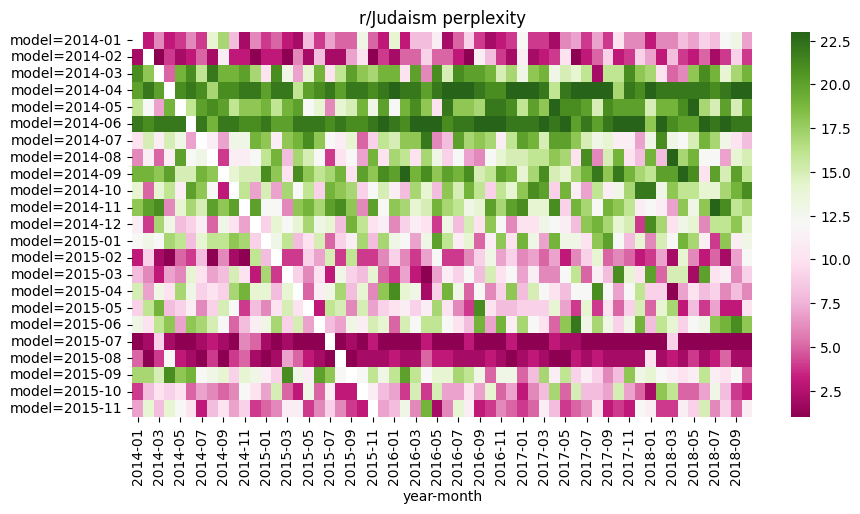

In [70]:
plt.figure(figsize=(10, 5))
sns.heatmap(ranked.T, cmap='PiYG')
plt.title(f"r/{subreddit} perplexity")
plt.savefig(f"figures/{subreddit}_ppl_ranking.png")

In [71]:
import numpy as np
scores_only = samples.drop(["year-month", "text"], axis=1)


In [72]:
scores_only

,model=2014-01,model=2014-02,model=2014-03,model=2014-04,model=2014-05,model=2014-06,model=2014-07,model=2014-08,model=2014-09,model=2014-10,...,model=2015-02,model=2015-03,model=2015-04,model=2015-05,model=2015-06,model=2015-07,model=2015-08,model=2015-09,model=2015-10,model=2015-11
id,,,,,,,,,,,,,,,,,,,,,
cf1yhek,30.190969,40.641815,49.170174,55.688469,48.167473,46.101707,36.269688,38.996971,46.007744,43.244640,...,48.474018,40.587666,48.217960,44.028774,47.828033,47.901291,35.784950,52.441334,40.598213,42.172405
cel4dc9,29.579306,52.353901,66.236397,59.849609,51.540161,55.710911,43.767494,53.586456,56.725033,54.537983,...,45.892262,37.096180,39.645226,56.085854,43.415600,48.474224,40.803238,49.349911,39.400555,46.895107
cevoo7z,505.256042,840.276123,739.042664,772.874634,1073.509155,732.985291,916.177551,638.551208,1061.481812,943.086121,...,519.978943,527.059509,571.030029,481.875092,435.909576,605.840759,839.096497,478.024170,656.471558,906.645752
cf2poxr,372.365540,581.407349,616.247009,520.478577,750.205566,593.627380,1016.174988,694.580383,490.407623,554.518250,...,453.206787,721.777649,773.796509,432.962982,547.817688,381.694275,699.901489,529.825134,366.145721,519.087402
cf10dah,50.088993,77.382202,61.736755,74.251534,73.246498,79.041077,78.546074,72.536743,85.923042,70.648613,...,73.672676,75.496605,72.501633,92.239212,69.161636,71.261917,72.297874,69.778000,71.389061,67.794426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
e8642uv,89.180405,91.687607,86.547241,83.339211,80.077179,93.499786,80.100677,71.643250,81.584366,86.175819,...,75.142006,83.133583,77.881973,78.600555,83.166077,83.257881,80.530998,86.028099,83.698616,91.044205
e81yfrk,109.041321,138.063324,137.771561,112.876389,118.084000,124.603500,133.483246,136.533615,133.272049,131.192947,...,141.918442,149.767090,141.828918,129.829041,149.856216,135.381027,123.372993,212.326859,127.033859,135.416946
e7u2g3k,211.847382,308.433746,224.335495,262.636139,187.505280,303.440521,238.260468,203.621078,144.984512,231.607849,...,231.124405,160.629868,172.370453,205.129776,323.194153,319.599396,117.112541,150.663818,176.727768,193.820419


In [73]:
score_median = np.median(scores_only.values, axis=1)
score_variance = np.std(scores_only.values, axis=1)

In [74]:
score_variance

array([  5.5633646 ,   8.27228881, 182.54186302, ...,  60.90135458,
        90.45205963,   4.93061227])

In [75]:
idx = np.argmax(score_variance)
print(score_variance[idx])
print(score_median[idx])

15160.130622422443
14988.310546875


In [76]:
samples.iloc[idx]['text']

'the perfect publisher for explosive allegations'

In [77]:
scores_only.iloc[idx]

model=2014-01    14988.310547
model=2014-02    46318.535156
model=2014-03    11329.001953
model=2014-04    13901.533203
model=2014-05    43670.339844
model=2014-06    14661.648438
model=2014-07     4456.190430
model=2014-08    19044.583984
model=2014-09    14982.653320
model=2014-10     9365.537109
model=2014-11     7195.288574
model=2014-12    26487.976562
model=2015-01    46654.445312
model=2015-02    27566.843750
model=2015-03    29176.230469
model=2015-04     9936.924805
model=2015-05    12981.029297
model=2015-06    53406.312500
model=2015-07    13581.769531
model=2015-08    13249.219727
model=2015-09    55993.933594
model=2015-10    21785.708984
model=2015-11    21231.128906
Name: dpsbwdv, dtype: float64

In [82]:
token_ppls['2014-01'][idx]

[(1169, 6.241959),
 (2818, 11.472899),
 (9991, 1.3765081),
 (329, 29.0999),
 (13835, 5.2250247),
 (7636, 1.0)]